In [15]:
#PART 1

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns

In [17]:
file_path = '/Users/banawata/Documents/Ironhack/Labs/GitHub/week5/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [18]:
print(df.columns)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


In [19]:
# Check unique values in the 'isBestSeller' column
print(df['isBestSeller'].unique())



[False  True]


In [20]:
# Create a crosstab between the product category and the isBestSeller status
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# If the values are True/False, change the columns to match:
crosstab['proportion_best_seller'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Sort the categories by the proportion of best-sellers in descending order
sorted_crosstab = crosstab.sort_values(by='proportion_best_seller', ascending=False)

# Display the top categories
print(sorted_crosstab.head(10))


isBestSeller                    False  True  proportion_best_seller
category                                                           
Grocery                          9008   556                0.058135
Smart Home Security & Lighting     98     6                0.057692
Health & Personal Care           9017   552                0.057686
Mobile Phone Accessories          248    11                0.042471
Power & Hand Tools               8353   306                0.035339
Billiard, Snooker & Pool          241     8                0.032129
Pet Supplies                     9152   285                0.030200
Home Brewing & Wine Making        239     7                0.028455
Wind Instruments                  243     7                0.028000
Mirrors                           243     7                0.028000


In [21]:

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab.iloc[:, :2])  # only consider the True/False columns for the test

# Print the Chi-square test results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Statistic: 36540.20270061387
P-value: 0.0
Degrees of Freedom: 295


In [22]:


# Calculate Cramér's V
n = crosstab.sum().sum()  # total number of observations
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

# Print the Cramér's V
print(f"Cramér's V: {cramers_v}")


Cramér's V: 0.08646706664522864


Here’s the interpretation of your results:

Chi-Square Test: Since the p-value is less than 0.05, we reject the null hypothesis, meaning that the distribution of best-seller status is dependent on product category.
Cramér's V: The value of Cramér's V (0.086) indicates that although there is a relationship between best-seller status and product category, the association is very weak.
You can now move forward with the visualizations for Part 1, which will help illustrate these findings more clearly. Let me know if you need help with those! ​​


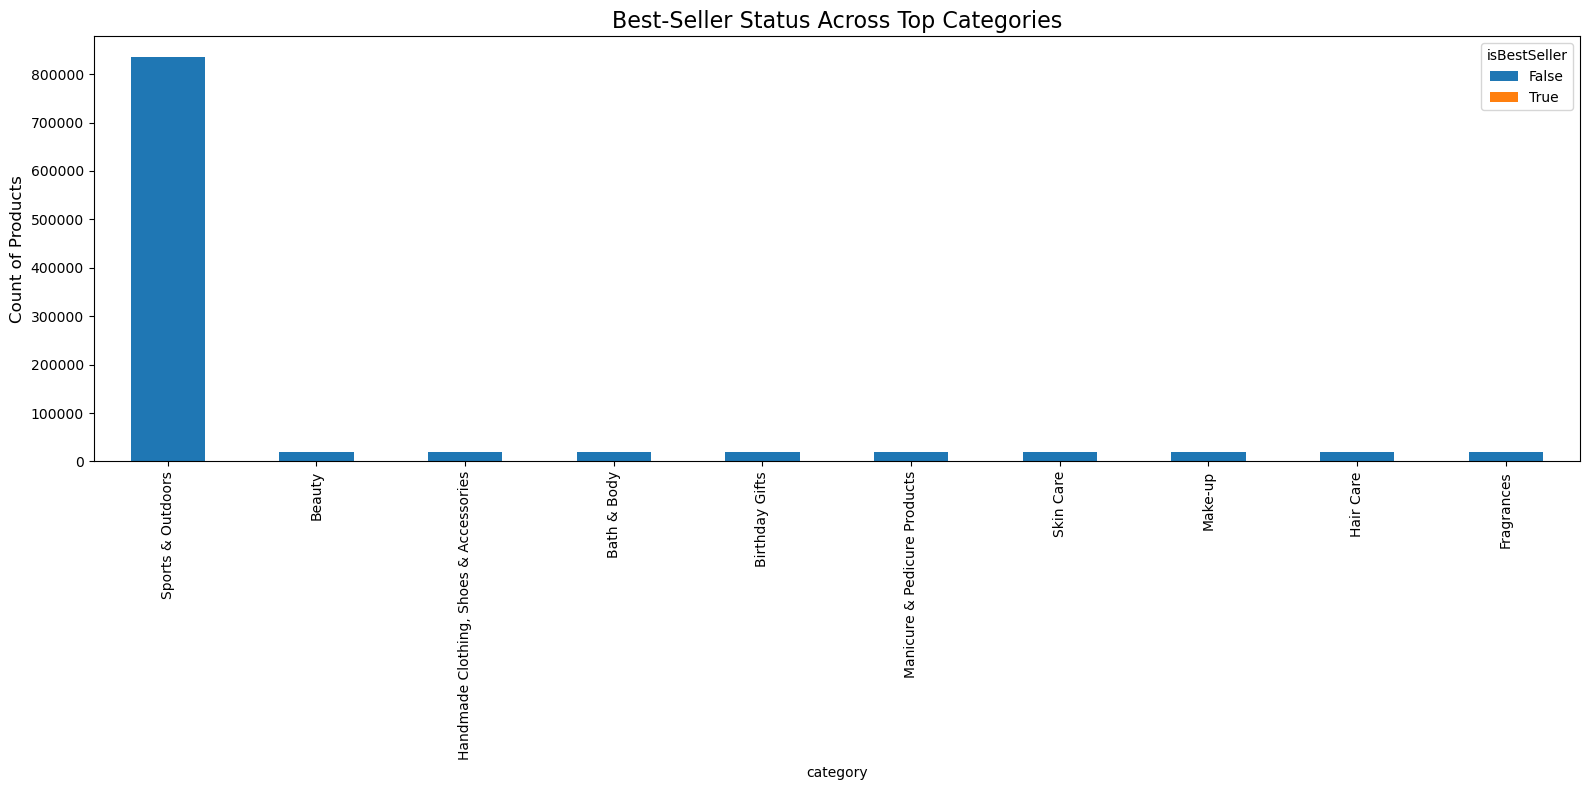

In [54]:
# Create a crosstab between product category and isBestSeller status
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Select the top categories based on count
top_categories = df['category'].value_counts().index[:10]

# Filter the crosstab for the top categories
top_crosstab = crosstab.loc[top_categories]


# Plot the stacked bar chart for top categories
top_crosstab.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title('Best-Seller Status Across Top Categories', fontsize=16)
plt.ylabel('Count of Products', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
#PART 2

In [27]:
# Calculate the IQR for the price column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"Number of records before outlier removal: {df.shape[0]}")
print(f"Number of records after outlier removal: {df_clean.shape[0]}")


Number of records before outlier removal: 2443651
Number of records after outlier removal: 2115963


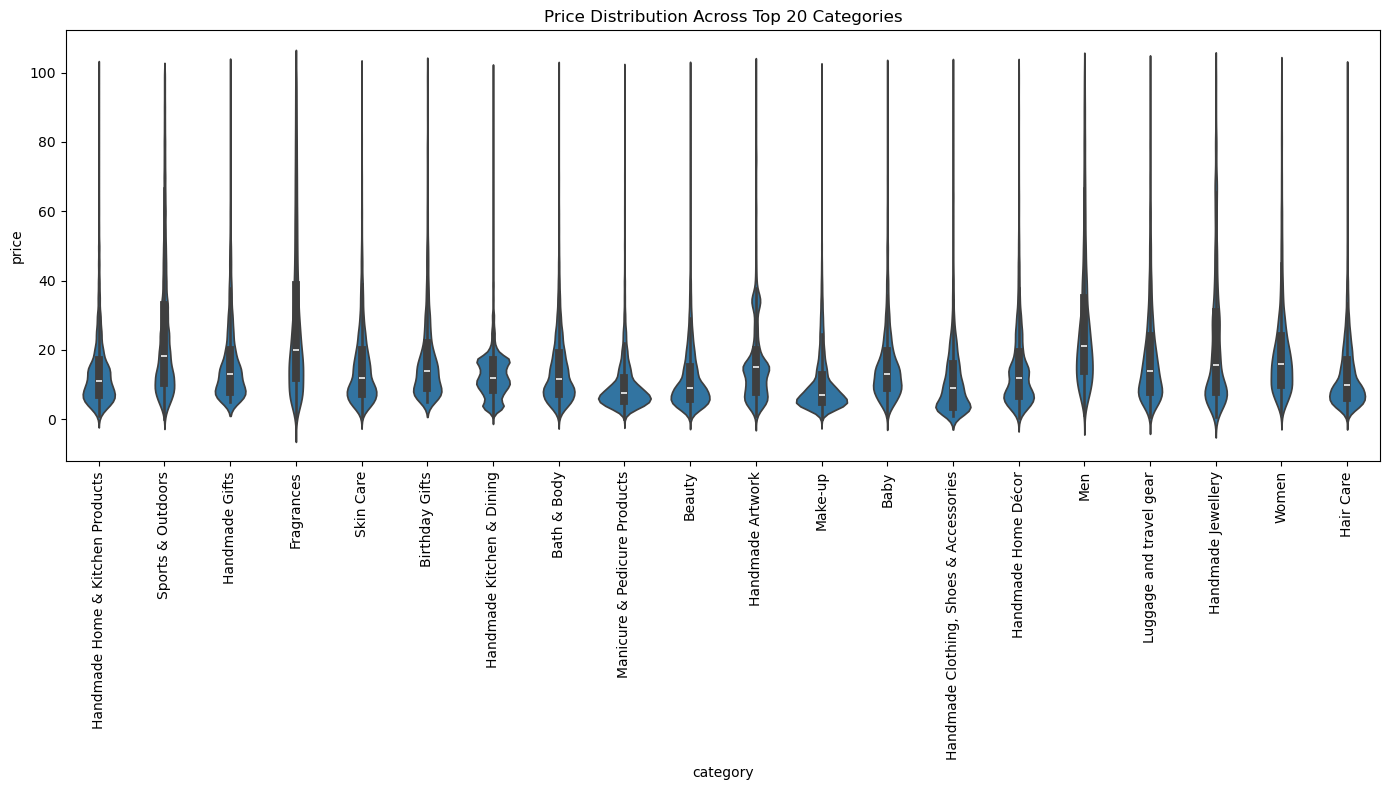

In [29]:
# Select the top 20 categories based on the count of products
top_20_categories = df_clean['category'].value_counts().index[:20]

# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='price', data=df_clean[df_clean['category'].isin(top_20_categories)])
plt.xticks(rotation=90)
plt.title('Price Distribution Across Top 20 Categories')
plt.tight_layout()
plt.show()


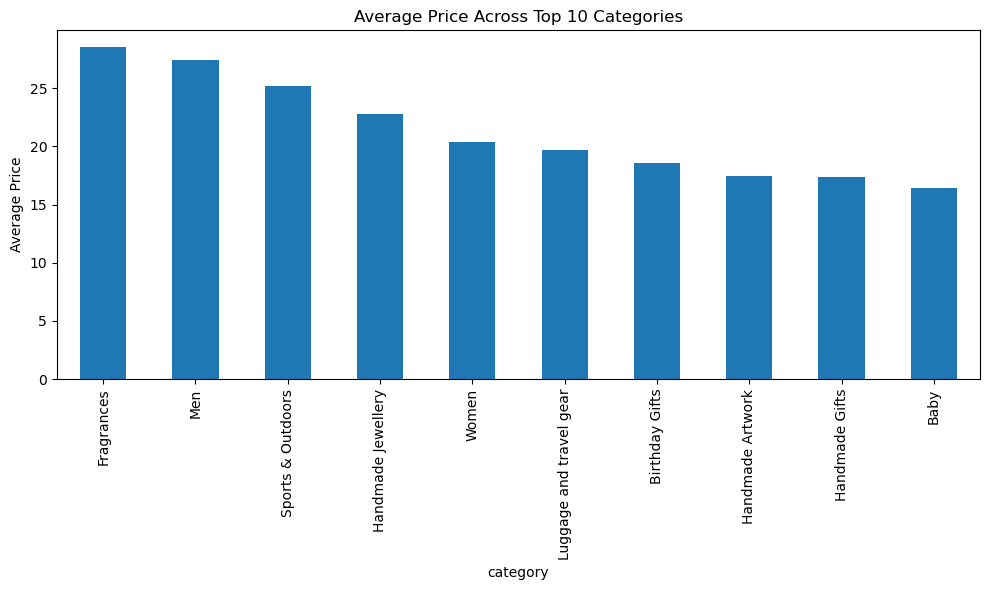

In [31]:
# Calculate the average price for each category
avg_price = df_clean[df_clean['category'].isin(top_20_categories)].groupby('category')['price'].mean()

# Sort the average prices and select the top 10 categories
top_10_avg_price = avg_price.nlargest(10)

# Create the bar chart
top_10_avg_price.plot(kind='bar', figsize=(10, 6))
plt.title('Average Price Across Top 10 Categories')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


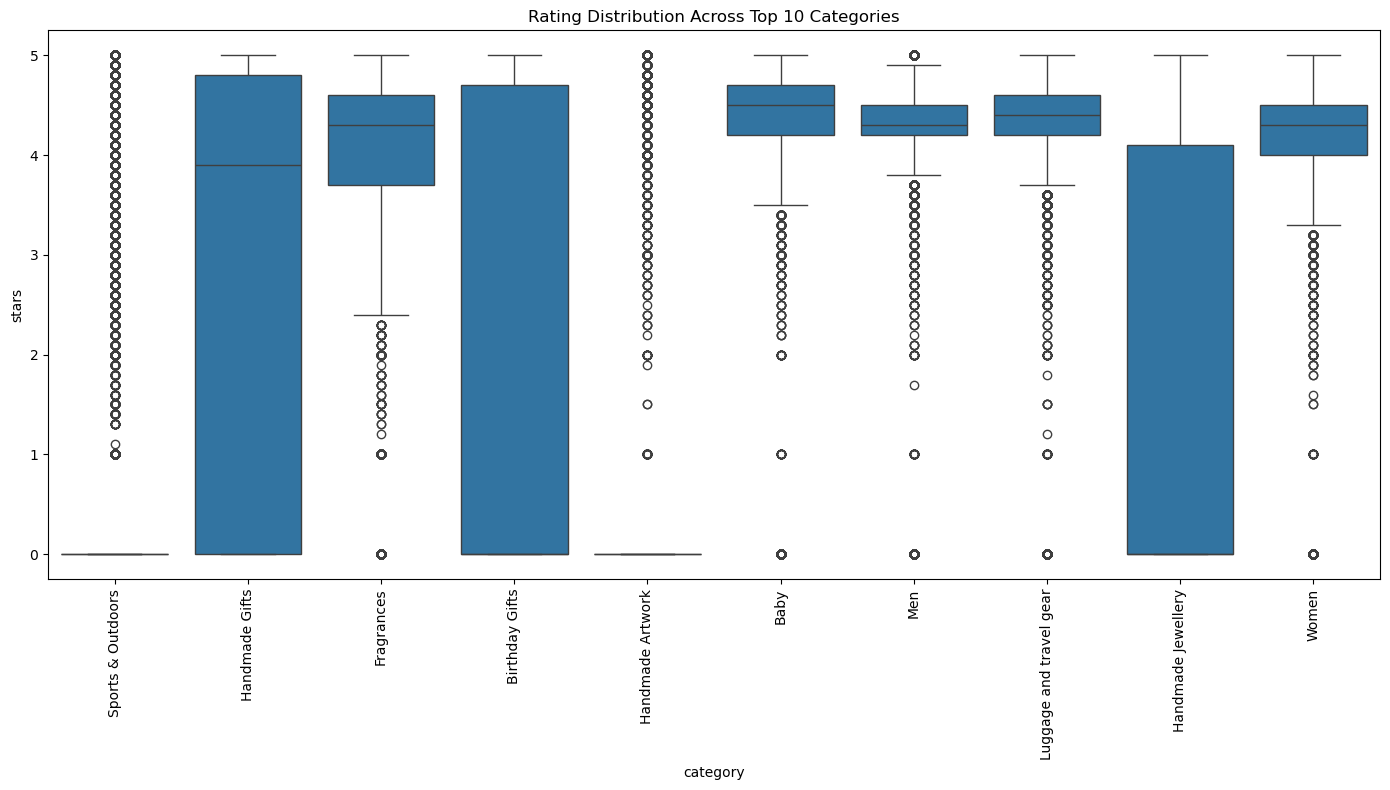

In [33]:
# Create a box plot for product ratings across categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='stars', data=df_clean[df_clean['category'].isin(top_10_avg_price.index)])
plt.xticks(rotation=90)
plt.title('Rating Distribution Across Top 10 Categories')
plt.tight_layout()
plt.show()


Gifts, Fragrances, and Jewellery tend to have both high ratings and relatively higher prices, suggesting that customers are willing to pay more for products in these categories and are generally satisfied with them.


Baby Products, while priced lower, still receive good ratings overall, although there is more variation in ratings compared to other categories.


The violin plots further support the observation that some categories, like Fragrances, have a broader price distribution, while others, like Baby Products, are more tightly clustered around a lower price point.


In [ ]:
#PART 3

In [36]:
# Correlation between price and rating (stars)
correlation = df_clean['price'].corr(df_clean['stars'])
print(f"Correlation between price and rating: {correlation}")

Correlation between price and rating: -0.07767299878181352


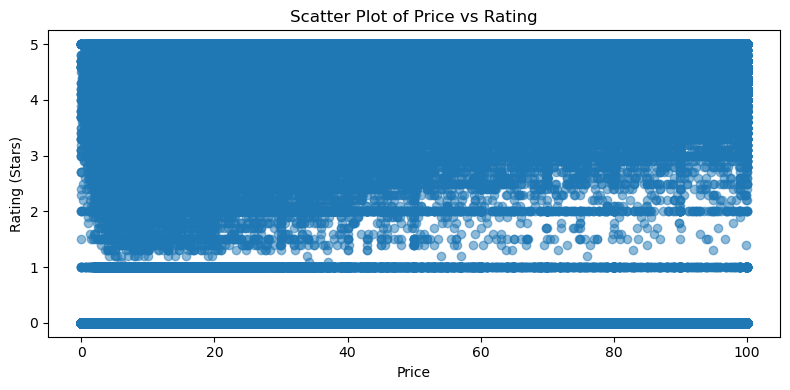

In [56]:
# Scatter plot for price vs rating
plt.figure(figsize=(8, 4))
plt.scatter(df_clean['price'], df_clean['stars'], alpha=0.5)
plt.title('Scatter Plot of Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating (Stars)')
plt.tight_layout()
plt.show()

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')


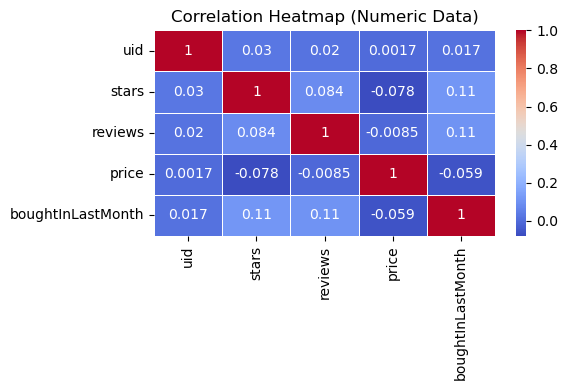

In [58]:
# Select only the numeric columns
df_numeric = df_clean.select_dtypes(include=[float, int])

# Check the column names to ensure only numeric columns are selected
print(df_numeric.columns)

# Generate the correlation heatmap with the numeric columns
plt.figure(figsize=(6, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Data)')
plt.tight_layout()
plt.show()


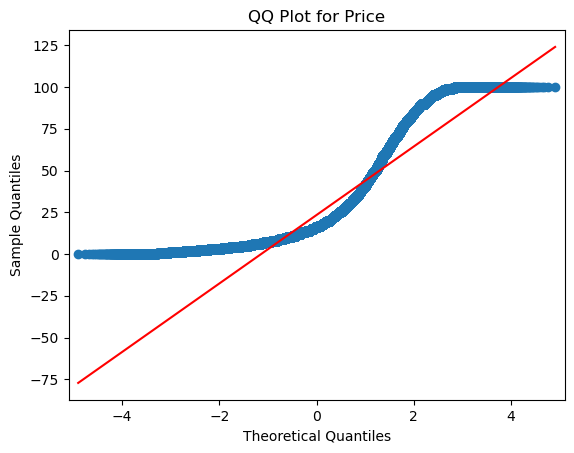

In [44]:
import statsmodels.api as sm

# QQ plot for price
sm.qqplot(df_clean['price'], line='s')
plt.title('QQ Plot for Price')
plt.show()


General Insights:
Weak Correlation: Price and rating have a negligible relationship. Customers seem to rate products based on factors other than price, leading to similar ratings for both expensive and cheap products.

Skewed Price Distribution: The prices are not normally distributed, with outliers at both extremes. This could imply that the dataset contains a mix of both very low-cost and premium products.

Consistency in Ratings: Despite the variation in prices, ratings remain concentrated around 4-5 stars, indicating that many products are rated highly, regardless of their cost.

This analysis suggests that businesses may need to focus more on quality, customer experience, and product features rather than price to improve ratings. Additionally, the presence of outliers in pricing might call for targeted marketing strategies for high-end or low-cost products.